In [3]:
# pip install taxoniq

In [46]:
import taxoniq
import pandas as pd

In [36]:
accs = {}
acc2species = {}
acc2genus = {}
not_found = set()
acc2family = {}
f = open('./clustering98_accessions.txt')

for line in f.readlines():
    acc = line.split(">")[1].split()[0]
    accs[acc] = ' '.join(line.split(">")[1].replace(" UNVERIFIED: ", " ").split()[1:3])

    try:
        t = taxoniq.Taxon(scientific_name=accs[acc])
        ranks = [(t.rank.name, t.scientific_name) for t in t.ranked_lineage]
        if ('class', 'Mammalia') in ranks:
            for rank in ranks:
                if rank[0] == 'species':
                    acc2species[acc] = rank[1]
                if rank[0] == 'genus':
                    acc2genus[acc] = rank[1]
    except:
        not_found.add(line.strip())
f.close()

In [58]:
links = []
found = set()

f = open('./genbank_and_refseq_mt.mash')
for line in f.readlines():
    ref = line.split()[0]
    query = line.split()[1]
    dist = 1.0-float(line.split()[2])
    if query != ref and (ref, query) not in found:
        found.add((ref, query))
        found.add((query, ref))
        if query in acc2species and ref in acc2species:
            species = 'Different'
            genus = 'Different'
            if acc2species[query] == acc2species[ref]:
                species = 'Same'
            if acc2genus[query] == acc2genus[ref]:
                genus = 'Same'
            links.append({"Genome 1":ref, "Genome 2": query, "Distance": dist, "Species": species, "Genus": genus})
f.close()
links = pd.DataFrame(links)

/home/alex/miniconda3/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/alex/miniconda3/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/alex/miniconda3/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/alex/miniconda3/lib/python3.9/site-packages/se

<Axes: xlabel='Distance', ylabel='Percent'>

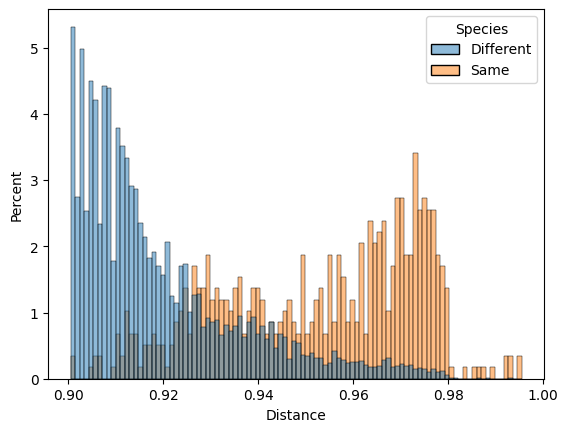

In [74]:
import seaborn as sns 

sns.histplot(links, x="Distance", hue="Species", bins=100, stat='percent', common_norm=False)

In [75]:
all = []
f = open('./genbank_and_refseq_mt.mash')
for line in f.readlines():
    ref = line.split()[0]
    query = line.split()[1]
    dist = 1.0-float(line.split()[2])
    if query != ref:
        if query in acc2species and ref in acc2species:
            all.append(dist)

<Axes: >

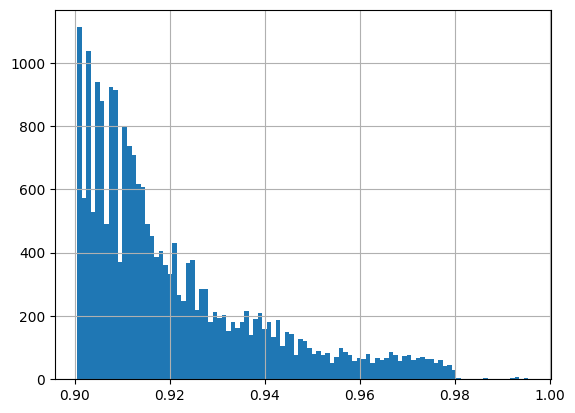

In [76]:
pd.Series(all).hist(bins=100)